In [21]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '/home/fbuonerba/codes/')
from mp_functions import upload_log_return, upload_factor_loadings
from coinapi_v1 import CoinAPIv1
import datetime
from datetime import datetime, timedelta
import time
import calendar
import json
import urllib.request
import multiprocessing as mp
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from fbprophet import Prophet

In [49]:
df=pd.DataFrame()
path='/home/fbuonerba/exchange_rates_data/exchange_rate_BTC_USD_'
tim=1501977600
returns=[]
days=[]
while tim<1533513600:
    with open(path+str(tim)+'.txt') as file:
        l=json.load(file)
    ll=l['rate']
    if np.isnan(ll)==True:
        ll=0
    returns.append(ll)
    utctim=datetime.fromtimestamp(tim).strftime('%Y-%m-%d')
    days.append(utctim)
    tim+=86400


In [50]:
df['ds']=np.array(days)
df['y']=np.array(returns)

In [55]:
m=Prophet()
m.fit(df)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/fbuonerba/.local/lib/python3.5/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [56]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-08-06,2526.030840,577.283516,4528.971900
1,2017-08-07,2508.344598,616.716969,4619.187690
2,2017-08-08,2577.408979,394.913624,4676.132853
3,2017-08-09,2589.874856,552.905159,4564.647169
4,2017-08-10,2616.489401,533.383392,4783.213108
5,2017-08-11,2660.670750,726.764190,4687.234233
6,2017-08-12,2736.272817,681.427252,4769.862717
7,2017-08-13,2860.984622,732.278909,4987.841425
8,2017-08-14,2843.298380,833.991698,4899.553601
9,2017-08-15,2912.362761,820.102482,4864.726591


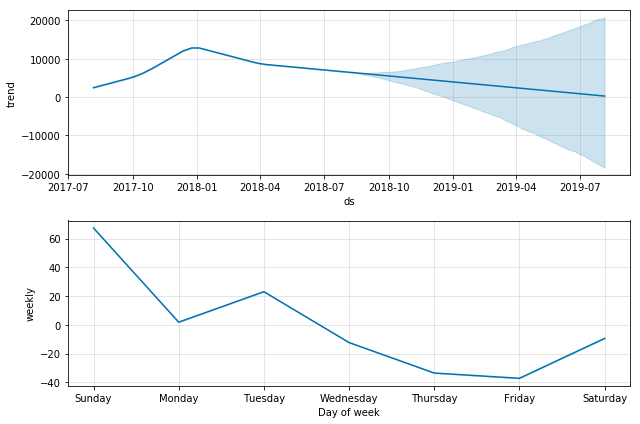

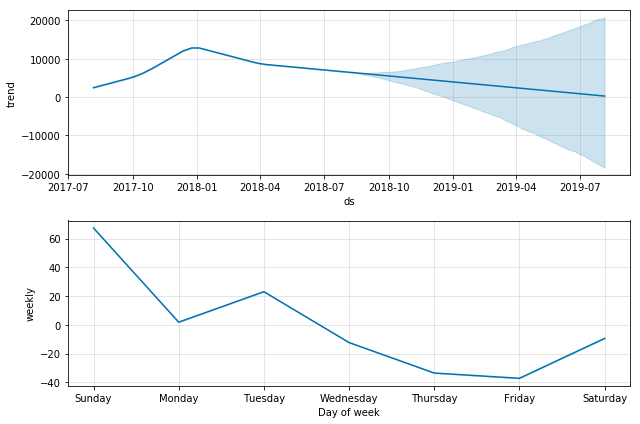

In [52]:
m.plot_components(forecast)

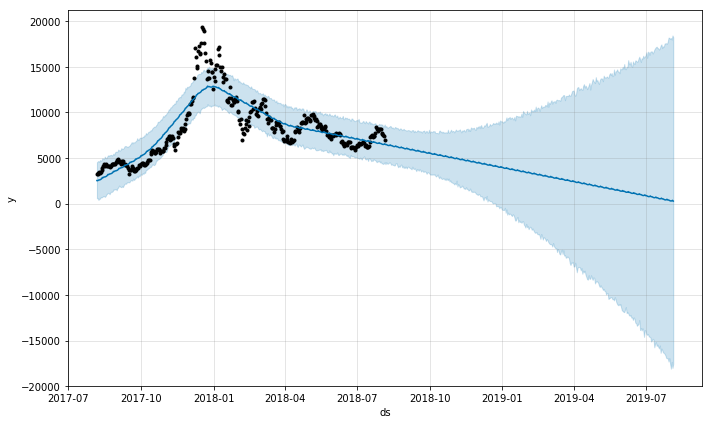

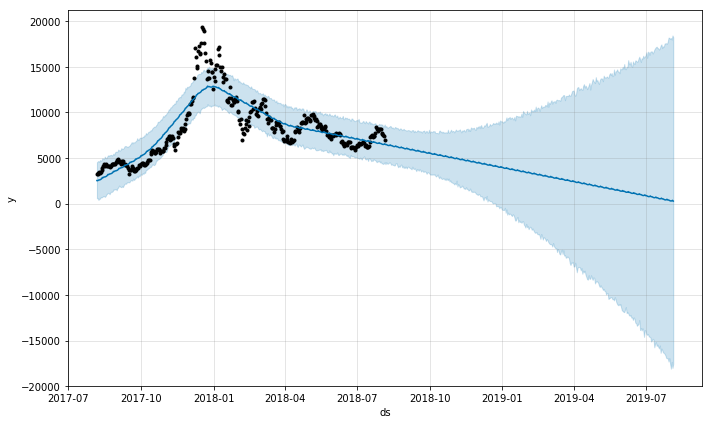

In [57]:
m.plot(forecast)